<a href="https://colab.research.google.com/github/ayushiiGeoradverse3/evs-practical-data-analysis/blob/main/evs_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("/content/co2-wide.csv")

# Data cleaning
df = df.replace('', np.nan)
year_cols = ['1975', '1985', '2005', '2010', '2015', '2019', '2020', '2021']
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

# Set country as index
df.set_index('country', inplace=True)

# **`Global Trend Over Time`** ⌛

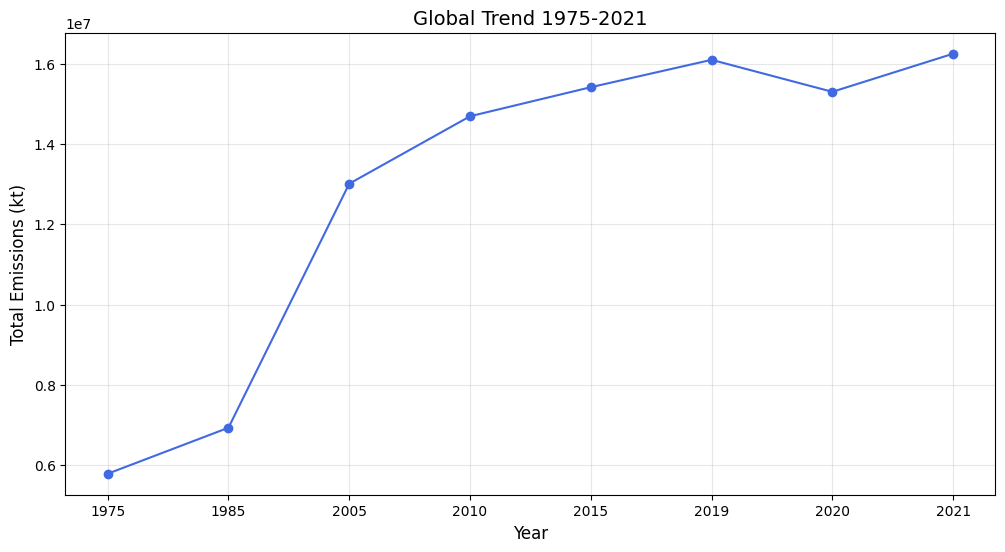

In [2]:
global_trend = df[year_cols].sum()
plt.figure(figsize=(12, 6))
global_trend.plot(kind='line', marker='o', color='royalblue')
plt.title('Global Trend 1975-2021', fontsize=14)
plt.ylabel('Total Emissions (kt)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# **Top 10 Countries in 2021**

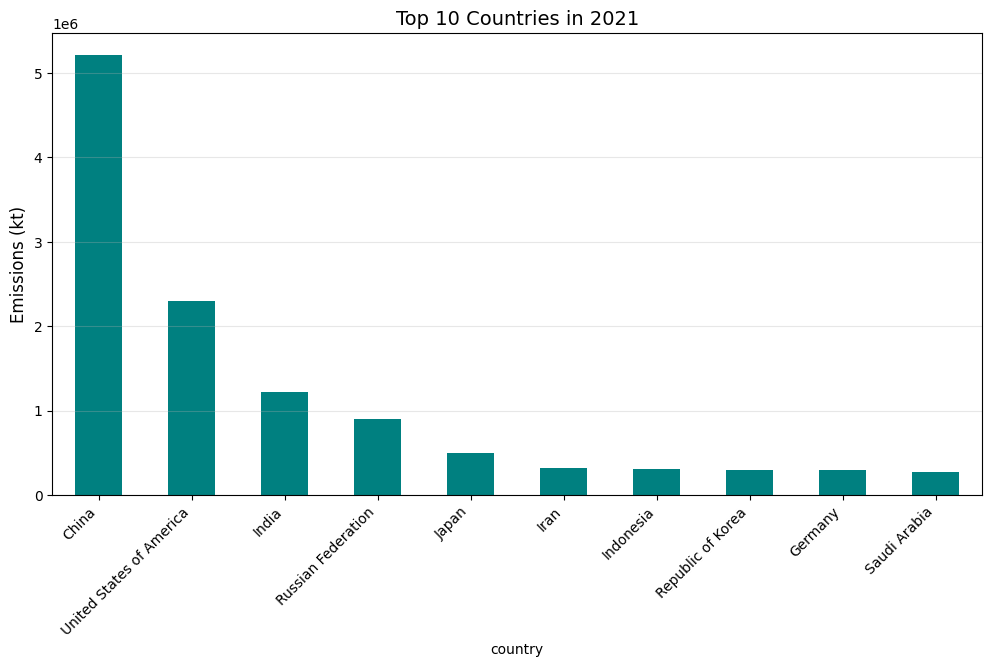

In [3]:
latest_year = '2021'
top_10 = df[latest_year].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10.plot(kind='bar', color='teal')
plt.title(f'Top 10 Countries in {latest_year}', fontsize=14)
plt.ylabel('Emissions (kt)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()

# ***Countries with Maximum Growth (1975-2021)***

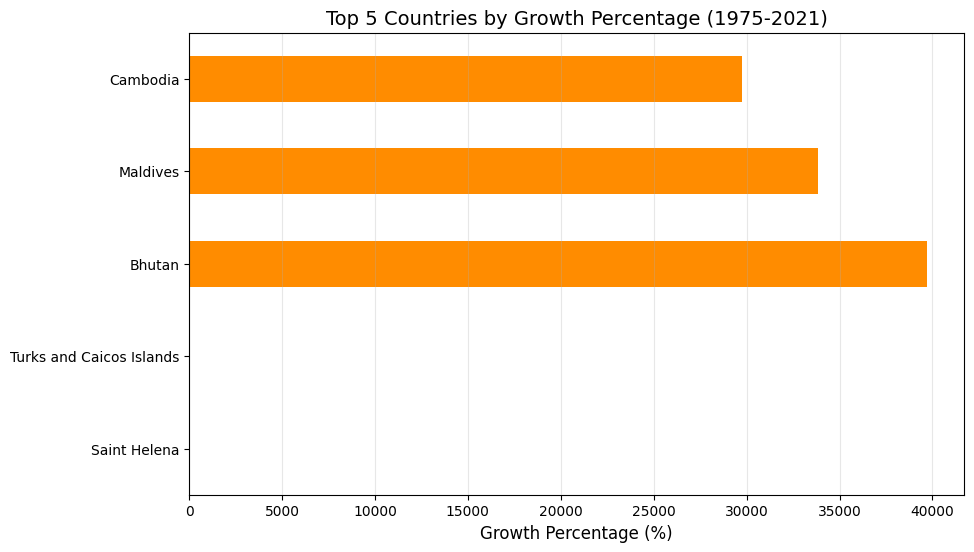

In [5]:
df['growth'] = (df['2021'] - df['1975']) / df['1975'] * 100
fastest_growth = df.nlargest(5, 'growth')

plt.figure(figsize=(10, 6))
fastest_growth['growth'].plot(kind='barh', color='darkorange')
plt.title('Top 5 Countries by Growth Percentage (1975-2021)', fontsize=14)
plt.xlabel('Growth Percentage (%)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.show()

# **Regional Comparison (2021)**

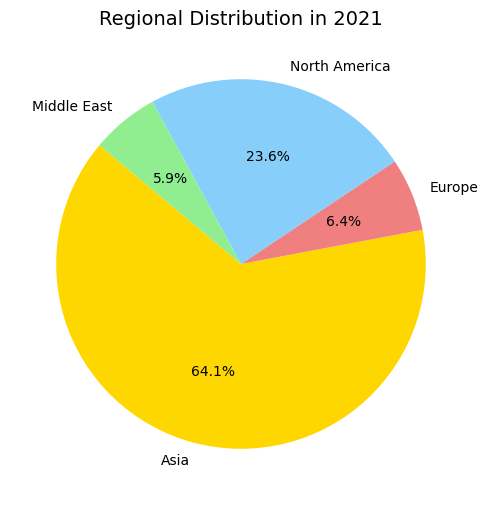

In [7]:
regions = {
    'Asia': ['China', 'India', 'Japan', 'Republic of Korea', 'Indonesia'],
    'Europe': ['Germany', 'United Kingdom', 'France', 'Italy'],
    'North America': ['United States of America', 'Canada', 'Mexico'],
    'Middle East': ['Saudi Arabia', 'Iran', 'United Arab Emirates']
}

regional_data = {region: df.loc[countries, '2021'].sum()
                for region, countries in regions.items()}

plt.figure(figsize=(10, 6))
plt.pie(regional_data.values(), labels=regional_data.keys(),
        autopct='%1.1f%%', startangle=140,
        colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Regional Distribution in 2021', fontsize=14)
plt.show()

# **COVID-19 Impact Comparison (2019-2020)**

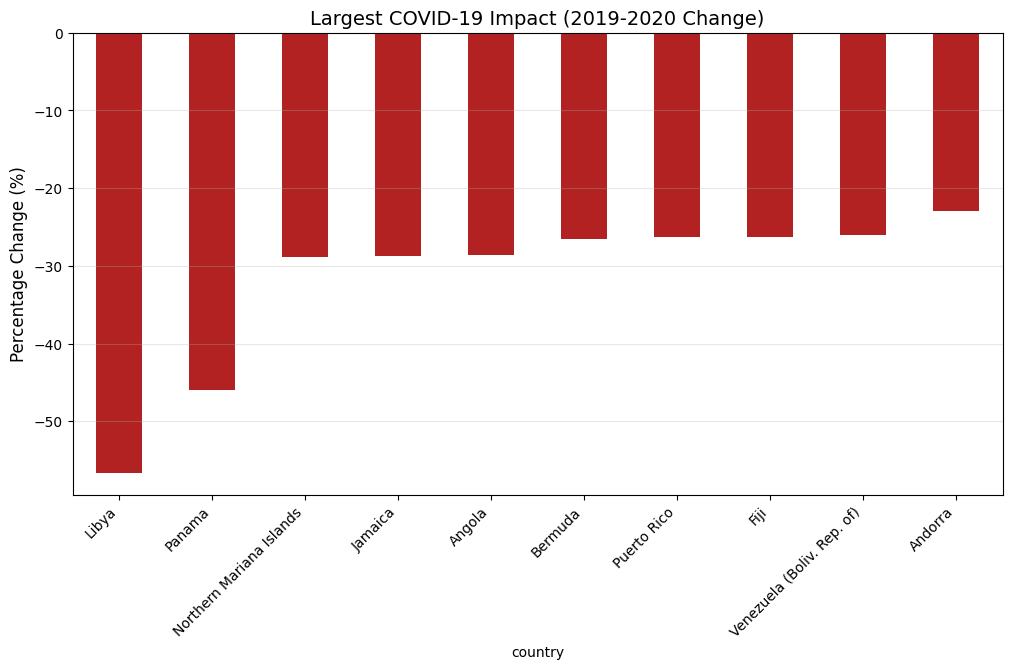

In [8]:
covid_change = (df['2020'] - df['2019']) / df['2019'] * 100
top_10_covid = covid_change.nsmallest(10)

plt.figure(figsize=(12, 6))
top_10_covid.plot(kind='bar', color='firebrick')
plt.title('Largest COVID-19 Impact (2019-2020 Change)', fontsize=14)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()